In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
data=pd.read_csv("train.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
x=data.iloc[:,:20]
y=data.iloc[:,-1]
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [6]:
y.head(20)

0     1
1     2
2     2
3     2
4     1
5     1
6     3
7     0
8     0
9     0
10    3
11    3
12    1
13    2
14    0
15    0
16    3
17    3
18    1
19    1
Name: price_range, dtype: int64

In [8]:
data.shape

(2000, 21)

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
bestfeature=SelectKBest(score_func=chi2,k=10)
fit=bestfeature.fit(x,y)
score=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(x.columns)
featureScores = pd.concat([columns,score],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [11]:
print(featureScores.nlargest(10,'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [12]:
x.drop(columns=['blue','clock_speed','dual_sim','four_g','m_dep','n_cores','pc','three_g','touch_screen','wifi'],axis=1,inplace=True)

In [11]:
x.head()

,battery_power,fc,int_memory,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,1,7,188,20,756,2549,9,7,19
1,1021,0,53,136,905,1988,2631,17,3,7
2,563,2,41,145,1263,1716,2603,11,2,9
3,615,0,10,131,1216,1786,2769,16,8,11
4,1821,13,44,141,1208,1212,1411,8,2,15


C:\Users\Pradeep Sivakumaran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.08245347 0.03872962 0.043138   0.04263182 0.06447063 0.0676344
 0.54265265 0.03736744 0.03983864 0.04108334]


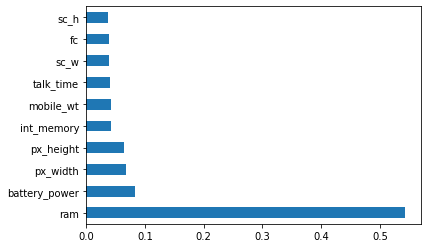

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()